# Crop Production In India

# Problem Statement:
The Agriculture business domain, as a vital part of the overall supply chain  is expected to highly evolve in the upcoming years via the developments, which are taking place on the side of the Future Internet. This paper presents a novel Business-to-Business collaboration platform from the agri-food sector perspective, which aims to facilitate the collaboration of numerous stakeholders belonging to associated business domains, in an effective and flexible manner.

This dataset provides a huge amount of information on crop production in India ranging from several years. Based on the Information the ultimate goal would be to predict crop production and find important insights highlighting key indicators and metrics that influence crop production.

In [226]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [227]:
#Define the dataset
df = pd.read_csv("/Users/nikhilreddyponnala/Desktop/Crop Production Analysis in India/Datasets/Crop Production data.csv")

In [228]:
# define head 
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [229]:
# define the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [230]:
# Describe the data
df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [231]:
# Define non-unique 
df.nunique()

State_Name          33
District_Name      646
Crop_Year           19
Season               6
Crop               124
Area             38442
Production       51627
dtype: int64

In [232]:
df.isna().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [233]:
df.dropna(how = "any",inplace  = True)

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242361 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     242361 non-null  object 
 1   District_Name  242361 non-null  object 
 2   Crop_Year      242361 non-null  int64  
 3   Season         242361 non-null  object 
 4   Crop           242361 non-null  object 
 5   Area           242361 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 14.8+ MB


In [235]:
df.describe(include = "object")

,State_Name,District_Name,Season,Crop
count,242361,242361,242361,242361
unique,33,646,6,124
top,Uttar Pradesh,TUMKUR,Kharif,Rice
freq,33189,931,94283,15082


In [236]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [237]:
df.Crop.value_counts()

Crop
Rice                 15082
Maize                13787
Moong(Green Gram)    10106
Urad                  9710
Sesamum               8821
                     ...  
Litchi                   6
Coffee                   6
Apple                    4
Peach                    4
Other Dry Fruit          1
Name: count, Length: 124, dtype: int64

In [238]:
#yearly growth in production by state_wise 
yearly_production = df.groupby("Crop_Year").agg({"Production":"sum"}).sort_values("Production",ascending = False)
                                                                                 

In [239]:
yearly_production

,Production
Crop_Year,
2011,1.430890e+10
2013,1.290359e+10
2006,8.681913e+09
2014,8.664541e+09
2004,8.189462e+09
2012,8.171055e+09
2005,8.043757e+09
2003,7.917974e+09
2008,7.717018e+09


<Axes: xlabel='Crop_Year', ylabel='Production'>

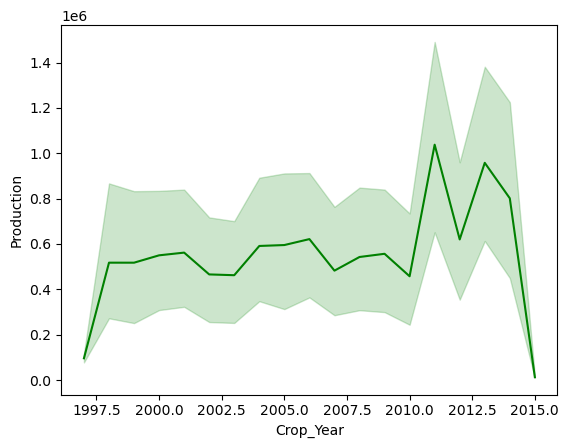

In [240]:
sns.lineplot(x = df["Crop_Year"],y = df["Production"],color = "green")

In [241]:
seasonality = df.groupby(["Season"]).agg({"Production":"sum"}).sort_values("Production",ascending = False)

In [242]:
seasonality

,Production
Season,
Whole Year,1.344248e+11
Kharif,4.029970e+09
Rabi,2.051688e+09
Winter,4.345498e+08
Summer,1.706579e+08
Autumn,6.441377e+07


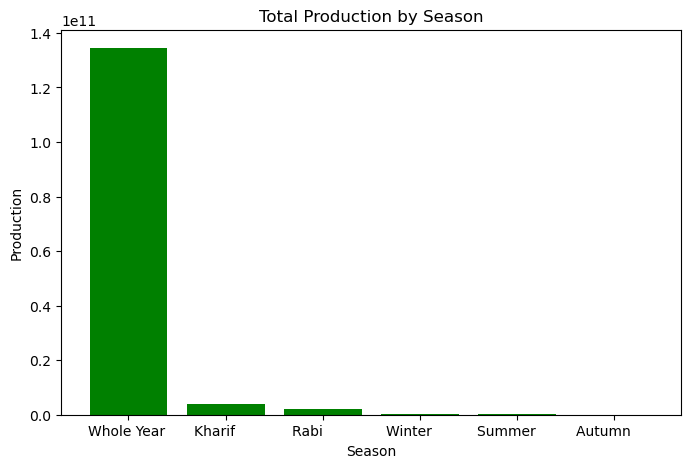

In [243]:
plt.figure(figsize=(8, 5))
plt.bar(seasonality.index, seasonality['Production'], color='green')
plt.xlabel('Season')
plt.ylabel('Production')
plt.title('Total Production by Season')
plt.show()

Whole Year crops produce the most, followed by Kharif and Rabi seasons. Winter, Summer, and Autumn produce much less, with Autumn being the lowest.

In [245]:
# this The top perfroming states

In [246]:
df.groupby("State_Name").agg({"Production":"mean"}).sort_values("Production",ascending = False).head()

,Production
State_Name,
Kerala,2.445167e+07
Andaman and Nicobar Islands,3.573250e+06
Goa,2.443265e+06
Andhra Pradesh,1.812006e+06
Tamil Nadu,9.103304e+05


In [247]:
df.groupby("Crop").agg({"Production":"mean"}).sort_values("Production",ascending = False).head()

,Production
Crop,
Coconut,6.638490e+07
Sugarcane,7.072546e+05
Total foodgrain,2.301636e+05
Wheat,1.691833e+05
Jute,1.289476e+05


In [248]:
df["Crop"].value_counts().head()

Crop
Rice                 15082
Maize                13787
Moong(Green Gram)    10106
Urad                  9710
Sesamum               8821
Name: count, dtype: int64

## Rice

In [250]:
df_rice = df.query("Crop == 'Rice'")

In [251]:
df_rice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15082 entries, 2 to 246089
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     15082 non-null  object 
 1   District_Name  15082 non-null  object 
 2   Crop_Year      15082 non-null  int64  
 3   Season         15082 non-null  object 
 4   Crop           15082 non-null  object 
 5   Area           15082 non-null  float64
 6   Production     15082 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 942.6+ KB


In [252]:
rice_seasonality = df_rice.groupby("Season").agg({"Production":"mean"}).sort_values("Production",ascending = False)

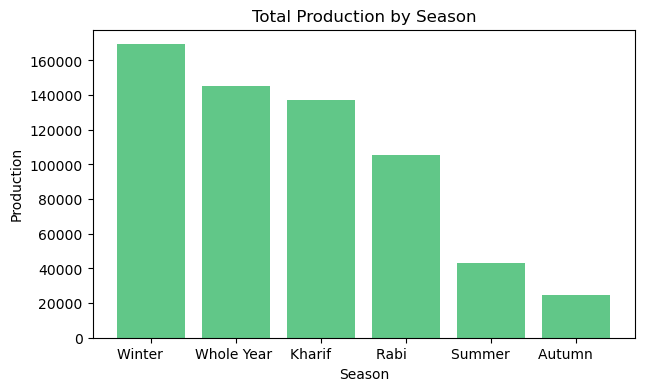

In [253]:
plt.figure(figsize=(7, 4))
plt.bar(rice_seasonality.index, rice_seasonality['Production'], color='#61c788')
plt.xlabel('Season')
plt.ylabel('Production')
plt.title('Total Production by Season')
plt.show()

In [254]:
df_rice_States = df_rice.groupby("State_Name").agg({"Production":"mean"})

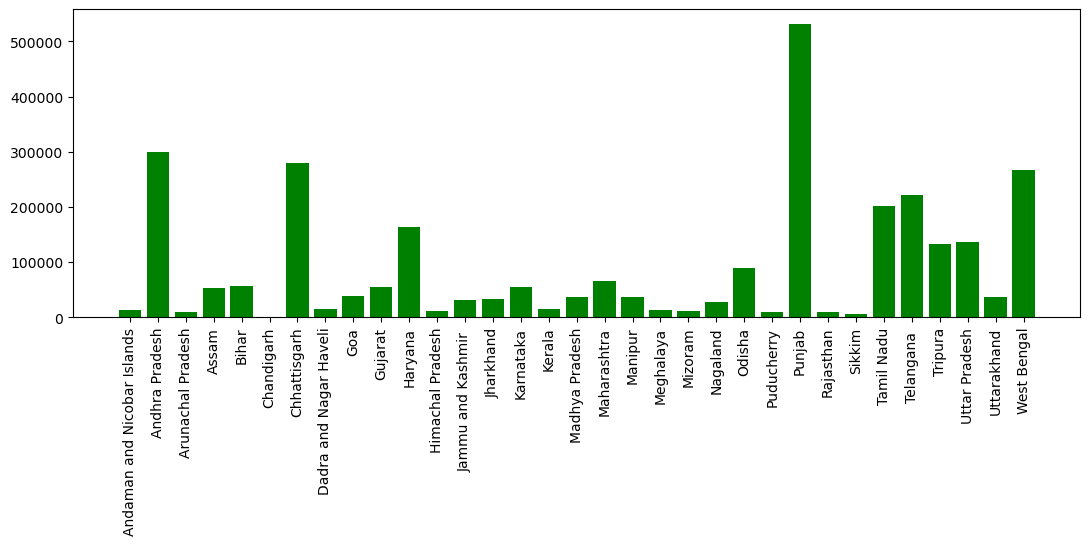

In [255]:
plt.figure(figsize=(13, 4))
plt.bar(df_rice_States.index,df_rice_States["Production"],color = "green")
plt.xticks(rotation=90)
plt.show()

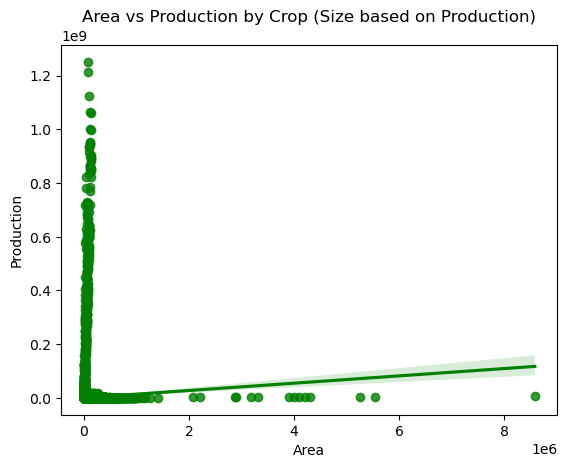

In [256]:
sns.regplot(data=df, x="Area", y="Production",color = "green")

# Adding titles and labels for clarity
plt.title('Area vs Production by Crop (Size based on Production)')
plt.xlabel('Area')
plt.ylabel('Production')
plt.show()


In [257]:
df_rice_ = df_rice.loc[:,["Area","Production"]].sort_values("Production",ascending = False)

In [258]:
df_rice_

,Area,Production
164232,367000.0,1710000.0
164259,362000.0,1637000.0
164245,367000.0,1625000.0
9830,409286.0,1624324.0
164219,366000.0,1566000.0
...,...,...
168858,1.0,1.0
14096,9865.0,0.0
19030,2100.0,0.0
70054,343.0,0.0


### Maize

In [260]:
df_maize = df.query("Crop == 'Maize'")

In [261]:
df_maize.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13787 entries, 71 to 246085
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     13787 non-null  object 
 1   District_Name  13787 non-null  object 
 2   Crop_Year      13787 non-null  int64  
 3   Season         13787 non-null  object 
 4   Crop           13787 non-null  object 
 5   Area           13787 non-null  float64
 6   Production     13787 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 861.7+ KB


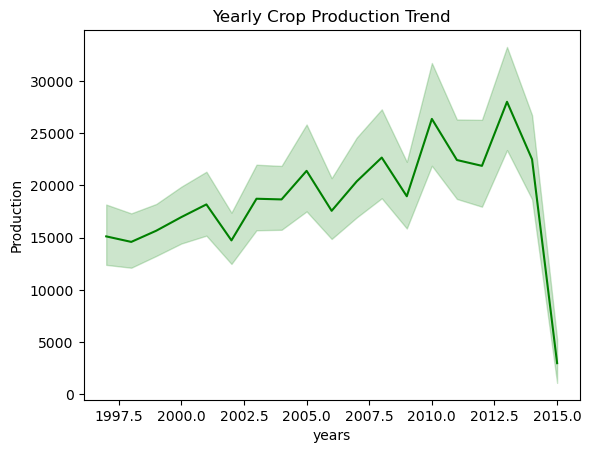

In [262]:
sns.lineplot(data = df_maize,x = "Crop_Year",y = "Production",color = "green")
plt.xlabel("years")
plt.ylabel("Production")
plt.title("Yearly Crop Production Trend")
plt.show()

In [263]:
Top_maize_states = df_maize.groupby("State_Name").agg({"Production":"sum"})

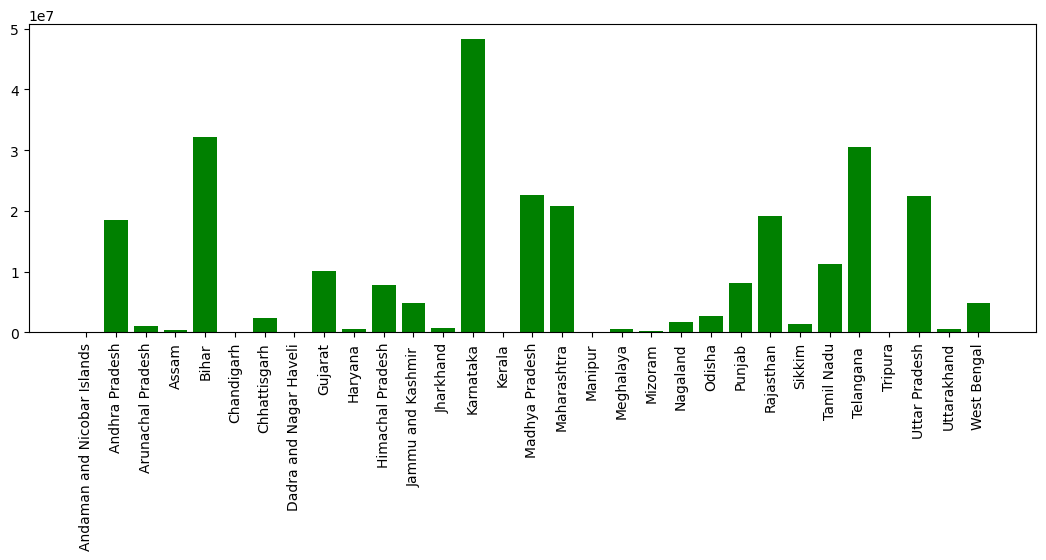

In [264]:
plt.figure(figsize=(13, 4))
plt.bar(Top_maize_states.index,Top_maize_states["Production"],color = "green")
plt.xticks(rotation = 90)
plt.show()

In [265]:
# top states who has maximum maize production

In [266]:
maize_seasonality = df_maize.groupby("Season").agg({"Production":"sum"}).sort_values("Production",ascending = False)

In [267]:
maize_seasonality

,Production
Season,
Kharif,1.965474e+08
Rabi,4.789535e+07
Summer,1.392421e+07
Autumn,8.933034e+06
Whole Year,5.987633e+06
Winter,5.412830e+04


In [268]:
maize_district = df_maize.groupby("District_Name").agg({"Production":"sum"}).sort_values("Production",ascending = False).head()

In [269]:
maize_district["percentage"] = (maize_district["Production"] / maize_district["Production"].sum()) * 100

In [270]:
maize_district = maize_district.reset_index()

In [271]:
maize_district

,District_Name,Production,percentage
0,KARIMNAGAR,8320331.0,24.023900
1,DAVANGERE,7496490.0,21.645164
2,BELGAUM,6739811.0,19.460349
3,GUNTUR,6607226.0,19.077527
4,HAVERI,5469698.0,15.793059


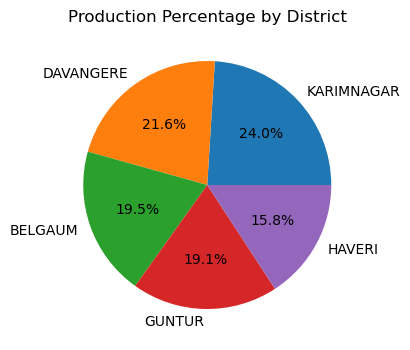

In [272]:
plt.figure(figsize = (4,5))
plt.pie(maize_district['percentage'], labels = maize_district['District_Name'], autopct='%1.1f%%')
plt.title("Production Percentage by District")
plt.show()

Thank you